In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/EstebanMariposa.jpeg'), cv2.COLOR_BGR2RGB)

In [ ]:
img.shape

(1024, 768, 3)

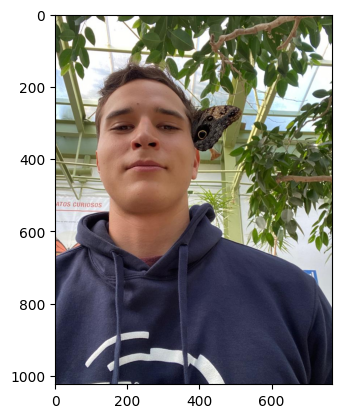

In [ ]:
plt.imshow(img)

In [ ]:
r, g, b = cv2.split(img)

In [ ]:
r, g, b = r/255, g/255, b/255

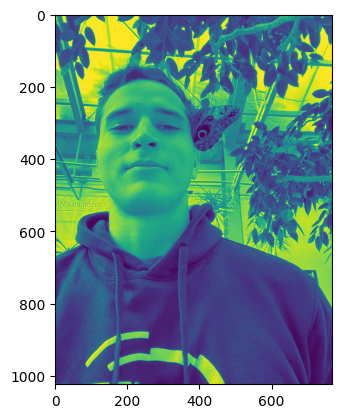

In [ ]:
plt.imshow(r)

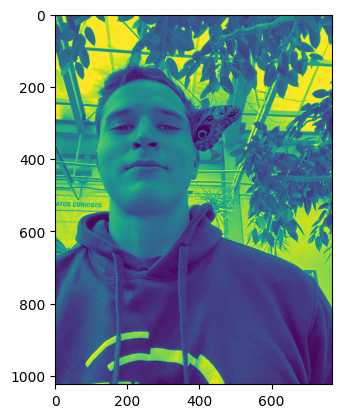

In [ ]:
plt.imshow(g)

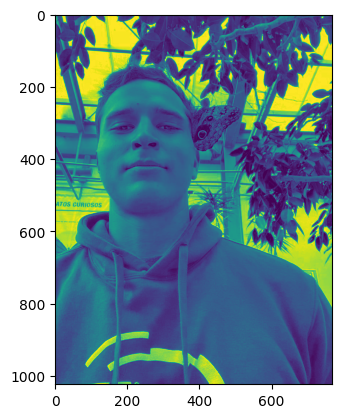

In [ ]:
plt.imshow(b)

Elegir el  numero correcto de dimensiones

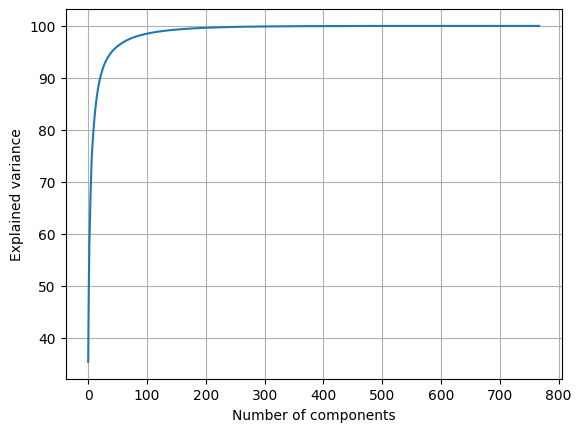

In [ ]:
pca_components768 = 768

pca_r768 = PCA(n_components=pca_components768)
pca_r768.fit_transform(r)

plt.grid()
plt.plot(np.cumsum(pca_r768.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

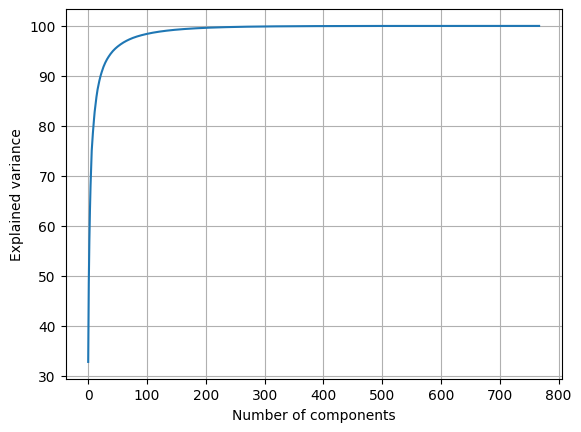

In [ ]:
pca_components768 = 768

pca_r768 = PCA(n_components=pca_components768)
pca_r768.fit_transform(g)

plt.grid()
plt.plot(np.cumsum(pca_r768.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

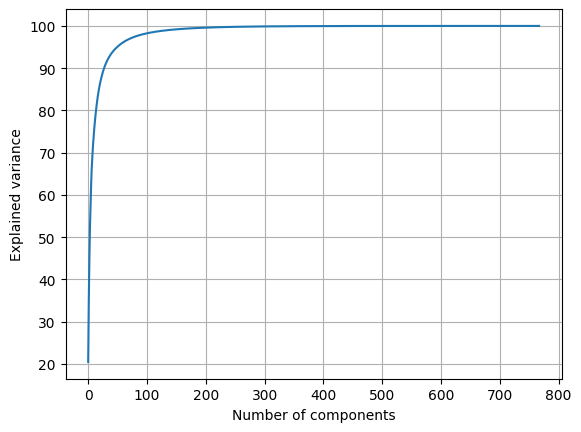

In [ ]:
pca_components768 = 768

pca_r768 = PCA(n_components=pca_components768)
pca_r768.fit_transform(b)

plt.grid()
plt.plot(np.cumsum(pca_r768.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

Compresión de imagen sin blaqueamiento

In [ ]:
pca_components = 200

pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

In [ ]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [ ]:
img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

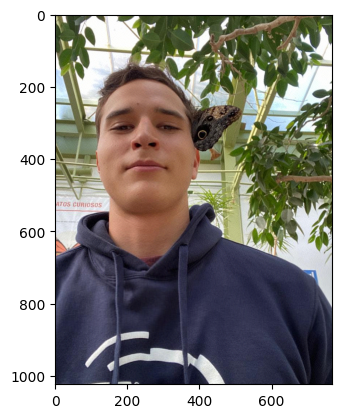

In [ ]:
plt.imshow(img_reconstructed)
plt.savefig('MariposaSinBlaqueamiento.png')

In [ ]:
print("Explained variance del componente red: ",np.cumsum(pca_r.explained_variance_ratio_ * 100)[-1])
print("Explained variance del componente green: ", np.cumsum(pca_g.explained_variance_ratio_ * 100)[-1])
print("Explained variance del componente blue: ", np.cumsum(pca_b.explained_variance_ratio_ * 100)[-1])

Explained variance del componente red:  99.63624124298937
Explained variance del componente green:  99.61278745472156
Explained variance del componente blue:  99.58501993836347


Compresión de imagen con blaqueamiento

In [ ]:
pca2_r = PCA(n_components=pca_components, whiten=True)
reduced2_r = pca2_r.fit_transform(r)

pca2_g = PCA(n_components=pca_components, whiten=True)
reduced2_g = pca2_g.fit_transform(g)

pca2_b = PCA(n_components=pca_components, whiten=True)
reduced2_b = pca2_b.fit_transform(b)

In [ ]:
reconstructed2_r = pca2_r.inverse_transform(reduced2_r)
reconstructed2_g = pca2_g.inverse_transform(reduced2_g)
reconstructed2_b = pca2_b.inverse_transform(reduced2_b)

In [ ]:
combined2 = np.array([reduced2_r, reduced2_g, reduced2_b])

In [ ]:
img_reconstructed2 = (cv2.merge((reconstructed2_r, reconstructed2_g, reconstructed2_b)))

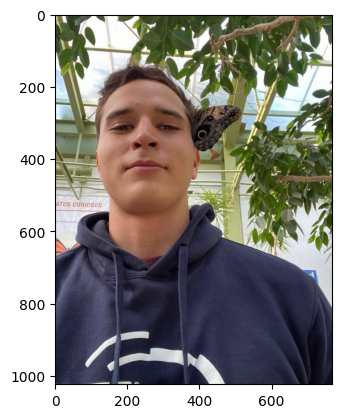

In [ ]:
plt.imshow(img_reconstructed2)
plt.savefig('MariposaConBlaqueamiento.png')

In [ ]:
print("Explained variance del componente red: ",np.cumsum(pca2_r.explained_variance_ratio_ * 100)[-1])
print("Explained variance del componente green: ", np.cumsum(pca2_g.explained_variance_ratio_ * 100)[-1])
print("Explained variance del componente blue: ", np.cumsum(pca2_b.explained_variance_ratio_ * 100)[-1])

Explained variance del componente red:  99.63642879275147
Explained variance del componente green:  99.61314559394685
Explained variance del componente blue:  99.58457627008245
